# **Neurosky Test Acquisition** 
Date: 18/12/2022

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.signal import find_peaks, butter, sosfilt, iirnotch, filtfilt

In [2]:
# define notch filter
def notch_filter(data: np.ndarray, fs: float, fc: float, quality_factor: float=30):
    """
    Apply notch filter with specified centre frequency 
    and width to time series and return filtered time 
    series.

    data (np.ndarray):
    fs (float): 
    fc (float):
    width (float):
    
    """
    b, a = iirnotch(w0=fc, Q=quality_factor, fs=fs)
    data_filt = filtfilt(b, a, data)
    return data_filt

In [3]:
data = np.loadtxt("/Users/pmccthy/Documents/EEG-from-scratch/data/neurosky_test_1.csv")

In [4]:
fs = 100
time_ax = np.arange(len(data)) / fs

In [5]:
# filter data
data_filt = notch_filter(data, fs, 26, quality_factor=2)

(0.0, 28.42)

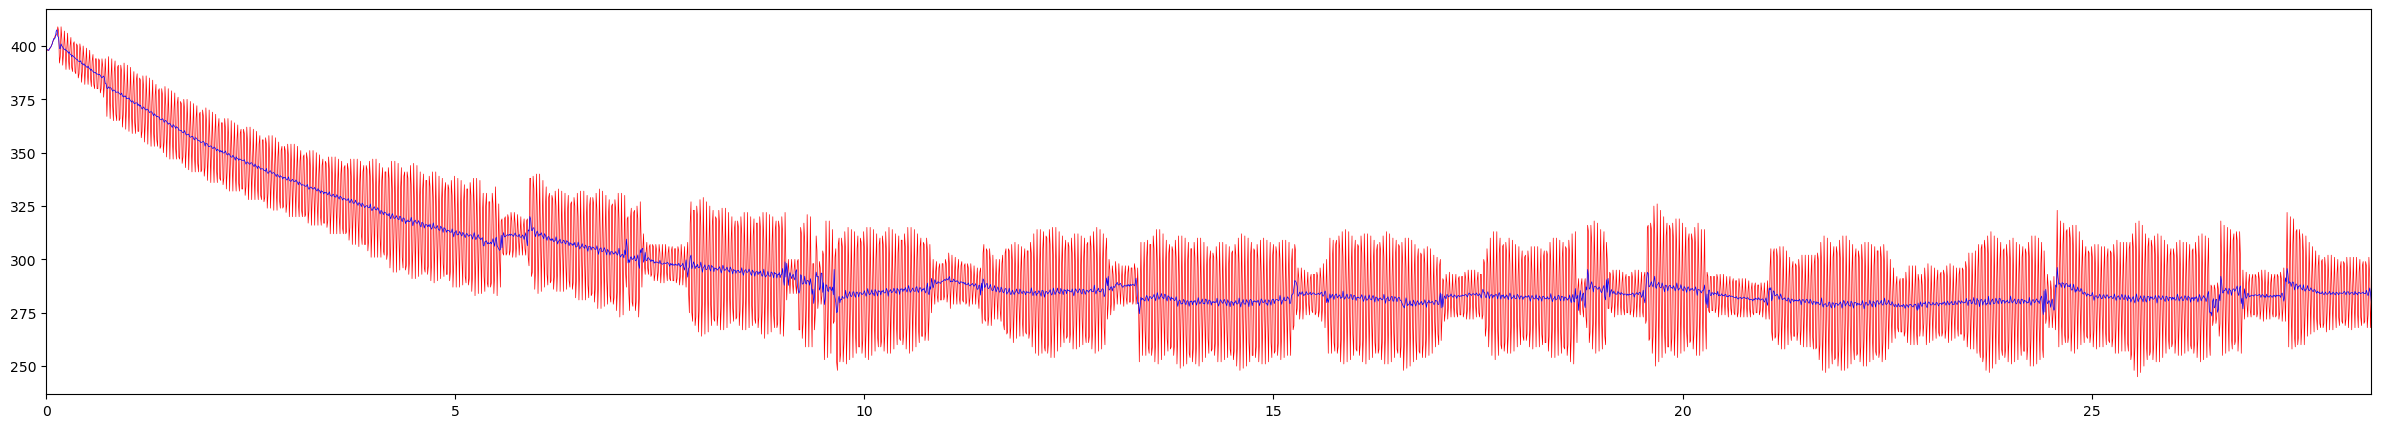

In [6]:
plt.figure(figsize=(30,5))
plt.plot(time_ax, data, lw=.5, c="r")
plt.plot(time_ax, data_filt, lw=.5, c="b")
plt.xlim(0,time_ax[-1])

#

In [7]:
# TODO: plot spectrogram

In [8]:
data_windowed = data * np.blackman(len(data))
dft_data = fft(data_windowed)
freq_ax = fftfreq(len(dft_data), 1/fs)

dft_data = dft_data[:len(dft_data)//2]
freq_ax = freq_ax[:len(freq_ax)//2]
psd = np.abs(dft_data**2)

In [9]:
peak_idx = find_peaks(psd, prominence=1e8)[0][0]

Text(0.5, 0, 'freq. (Hz)')

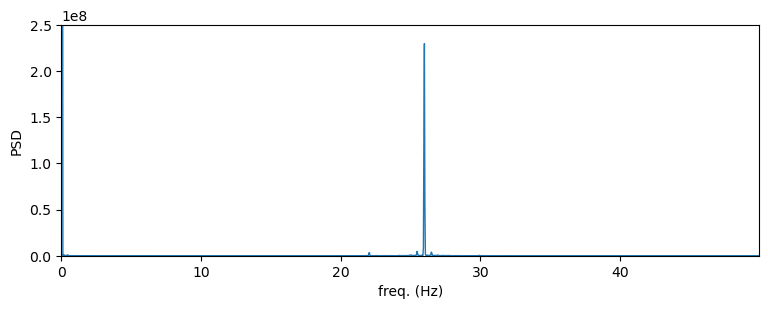

In [10]:
plt.figure(figsize=(9,3))
plt.plot(freq_ax, psd, lw=1)
plt.xlim(0,freq_ax[-1])
plt.ylim(-.1, .25e9)
plt.ylabel("PSD")
plt.xlabel("freq. (Hz)")

In [11]:
print(f"peak at {freq_ax[peak_idx]:.2f} Hz")

peak at 25.99 Hz


## Define filter

In [12]:
lpf_sos = butter(10, 20, 'lp', fs=fs, output='sos')
hpf_sos = butter(10, 1e-9, 'hp', fs=fs, output='sos')
filtered = sosfilt(lpf_sos, data)
filtered = sosfilt(hpf_sos, filtered)

(0.0, 2.0)

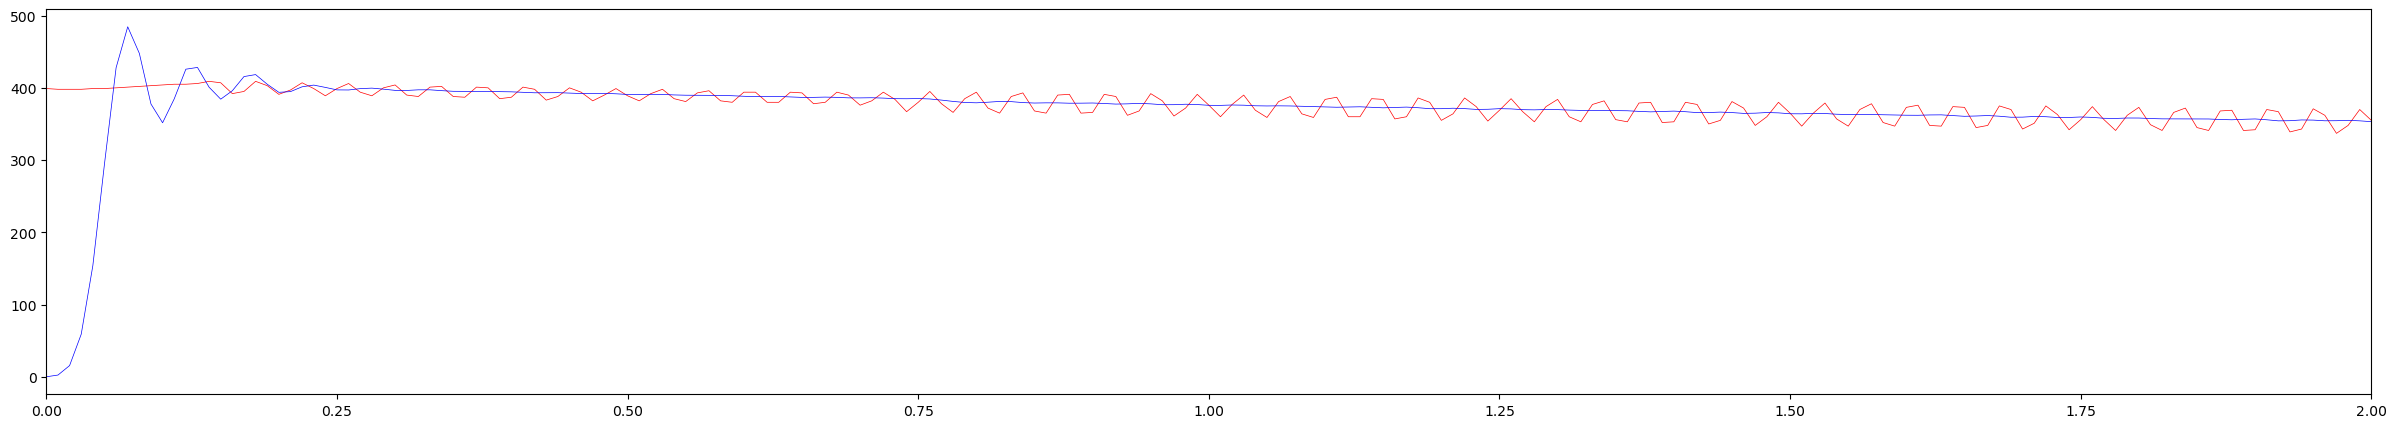

In [13]:
plt.figure(figsize=(30,5))
plt.plot(time_ax, data, lw=.5, c="r")
plt.plot(time_ax, filtered, lw=.5, c="b")
plt.xlim(0,time_ax[-1])
plt.xlim(0,2)